In [1]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
def integral(f_r, f_i, a, b, c, d):
    real = integrate.dblquad(f_r, a, b, c, d)
    im = integrate.dblquad(f_i, a, b, c, d)
    return complex(real[0], im[0])

# Parametros
a= 0.0001
d= 0.000356
D1= 0.5
D2= 0.5
lambda_g= 630*10**(-9)
z= np.linspace(-0.005, 0.005, 1000)

#Intensidades según Feynman
I_izq_f= np.zeros(len(z))
I_der_f= np.zeros(len(z))
I_doble_f= np.zeros(len(z))

In [3]:
for i in range(len(z)):
    # Intensidad
    di_real= lambda x, y: np.cos(np.pi/(D1*lambda_g)*(x-y)**2 + np.pi/(D2*lambda_g)*(z[i]-y)**2)
    di_img= lambda x, y: np.sin(np.pi/(D1*lambda_g)*(x-y)**2 + np.pi/(D2*lambda_g)*(z[i]-y)**2)
    
    # Intensidad Rendija izquierda
    i_izq= np.exp(2*np.pi*1j*(D1+D2)/lambda_g)*integral(di_real, di_img,-d/2-a/2, -d/2+a/2, lambda x: -a/2, lambda x: a/2)
    
    # Intensidad Rendija derecha
    i_der= np.exp(2*np.pi*1j*(D1+D2)/lambda_g)*integral(di_real, di_img, d/2-a/2, d/2+a/2,lambda x: -a/2, lambda x: a/2)
    
    # Módulo rendija izquierda
    I_izq_f[i]=  abs(i_izq)**2
    # Módulo rendija derecha
    I_der_f[i]=  abs(i_der)**2
    # Módulo doble rendija
    I_doble_f[i]= abs(i_der + i_izq)**2

In [4]:
# Intensidades según Fraunhofer
I_fr= 10**(-16)*(np.sin(np.pi*a/lambda_g*np.sin(z))/(np.pi*a/lambda_g*np.sin(z)))**2
I_doble_fr= 3.8*10**(-16)*(np.sin(np.pi*a/lambda_g*np.sin(z))/(np.pi*a/
                                lambda_g*np.sin(z)))**2*np.cos(np.pi/lambda_g*d*np.sin(z))**2

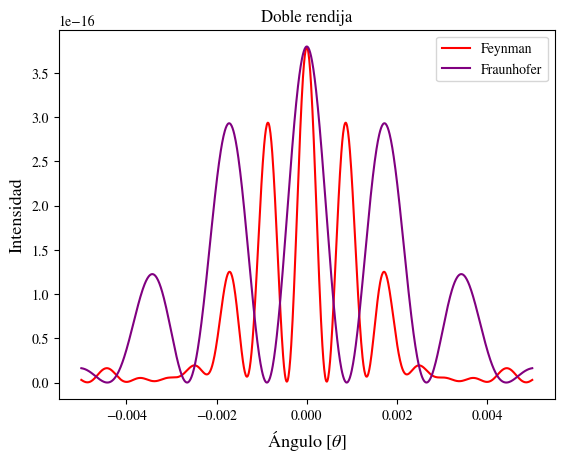

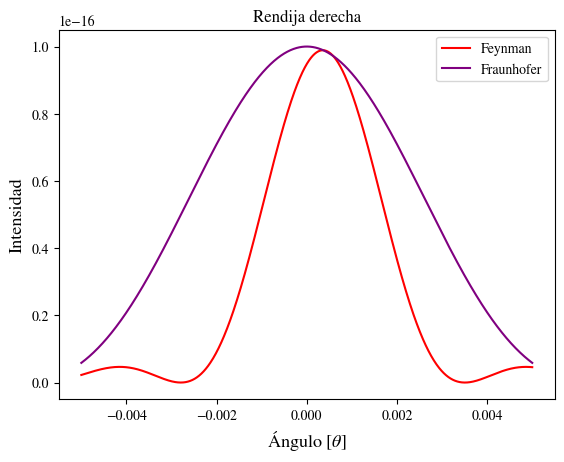

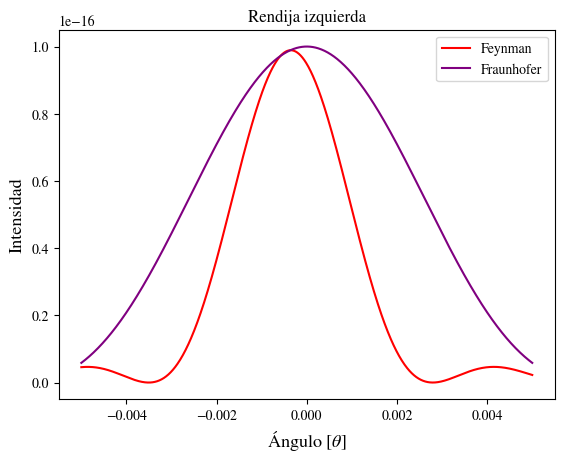

In [6]:
# Gráficas
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'

plt.figure()
plt.xlabel(r'Ángulo $[\theta]$', fontsize=13, color='black')
plt.ylabel('Intensidad', fontsize=13, color='black')
plt.title('Doble rendija')
plt.tick_params(axis='both', colors='black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')

plt.plot(z, I_doble_f, c='red', label='Feynman')
plt.plot(z, I_doble_fr, label='Fraunhofer',c='purple')
plt.legend()
plt.show


plt.figure()
plt.xlabel(r'Ángulo $[\theta]$', fontsize=13, color='black')
plt.ylabel('Intensidad', fontsize=13, color='black')
plt.title('Rendija derecha')
plt.tick_params(axis='both', colors='black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')

plt.plot(z, I_der_f, c='red',label='Feynman')
plt.plot(z, I_fr, label='Fraunhofer',c='purple')
plt.legend()
plt.show()


plt.figure()
plt.xlabel(r'Ángulo $[\theta]$', fontsize=13, color='black')
plt.ylabel('Intensidad', fontsize=13, color='black')
plt.title('Rendija izquierda')
plt.tick_params(axis='both', colors='black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['right'].set_color('black')

plt.plot(z, I_izq_f, c='red',label='Feynman')
plt.plot(z, I_fr, label='Fraunhofer',c='purple')
plt.legend()
plt.show()
